# **HW1** - Ayberk Kutlu - 22102385

# **Item-1**

## Numpy Exercise

## Objective:
Compare numpy standard deviation to the estimators on your sheet from first 
lecture

## Steps:
1. Create an array with 100 numbers
2. Compute standard deviation using numpy
3. Implement standard deviation from equation sheet yourself
4. Evaluate and compare!

## Formula:
![image.png](attachment:3823fdeb-4a7b-4edf-ab7d-23337c3d148f.png)

In [1]:
import numpy as np

In [2]:
#Creating array with 100 random numbers
data = np.random.randint(1, 101, size=100)
data

array([52, 43,  2, 70, 55, 25,  8, 56, 89, 95, 68, 70, 97, 93,  9, 86, 91,
       87, 22, 85,  3, 86,  2, 53, 69,  9, 42, 93, 17, 76, 56, 33, 75, 37,
       11, 31, 72, 82, 49, 22, 80, 25, 60, 81, 68, 66, 44, 71, 84, 64, 55,
       96, 54, 65, 78, 27, 72, 24, 72, 63, 13, 11, 50, 12, 48, 78, 71, 91,
       85, 75, 96, 32, 52, 97, 13, 30, 66, 83, 14, 60, 48, 90, 44, 18, 50,
       61,  2, 52, 45, 84, 86, 53, 65, 98, 12, 73, 23, 50, 68, 76],
      dtype=int32)

In [3]:
#Computing standard deviation using numpy
std= np.std(data)
std

np.float64(27.928972412174424)

In [4]:
#Implementing standard deviation from equation sheet

In [5]:
sum_value= np.sum(data)
mean= sum_value/len(data)
variance= np.sum((data-mean)**2)/ (len(data)-1)
std_data= variance ** (1/2)
std_data

np.float64(28.06967341556659)

In [6]:
from IPython.display import Markdown
Markdown(f"**Results** <br> numpy standard deviation -> **{std:.3f}**<br> estimators on our sheet -> **{std_data:.3f}**")

**Results** <br> numpy standard deviation -> **27.929**<br> estimators on our sheet -> **28.070**

# **Item-2**

### Objective:
 * Bin your data for different distributions of random numbers
### Steps:
 * Create arrays with 10k random numbers from different distributions (e.g. 
uniform, normal)
 * Bin this data (do not use already existing functions in the libraries)
 * Compare

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Creating data with different distributions

data_uniform = np.random.uniform(0, 1, size=10000)

# Normal distribution: mean=0.5, std=1/6  -> fits 3σ into [0,1]
data_normal = np.random.normal(0.5, 1/6, size=10000)
data_normal = data_normal[(data_normal >= 0) & (data_normal <= 1)]  # keep only values in [0,1]

# Exponential distribution (scale=0.2) -> compressed into [0,1]
data_exp = np.random.exponential(0.2, size=10000)
data_exp = data_exp[(data_exp >= 0) & (data_exp <= 1)]

In [9]:
#Manual Binning 
bins = 20
min_val = 0
max_val = 1
bin_width = (max_val - min_val) / bins
edges = np.linspace(min_val, max_val, bins+1)

def manual_binning(data, bins, min_val=0, max_val=1):
    counts = [0] * bins
    bin_width = (max_val - min_val) / bins
    for value in data:
        if min_val <= value < max_val:   # only values inside [0,1)
            index = int((value - min_val) / bin_width)
            if index == bins:   # if value == max_val
                index = bins - 1
            counts[index] += 1
    return counts

uniform_counts = manual_binning(data_uniform, bins)
normal_counts = manual_binning(data_normal, bins)
exponential_counts = manual_binning(data_exp, bins)

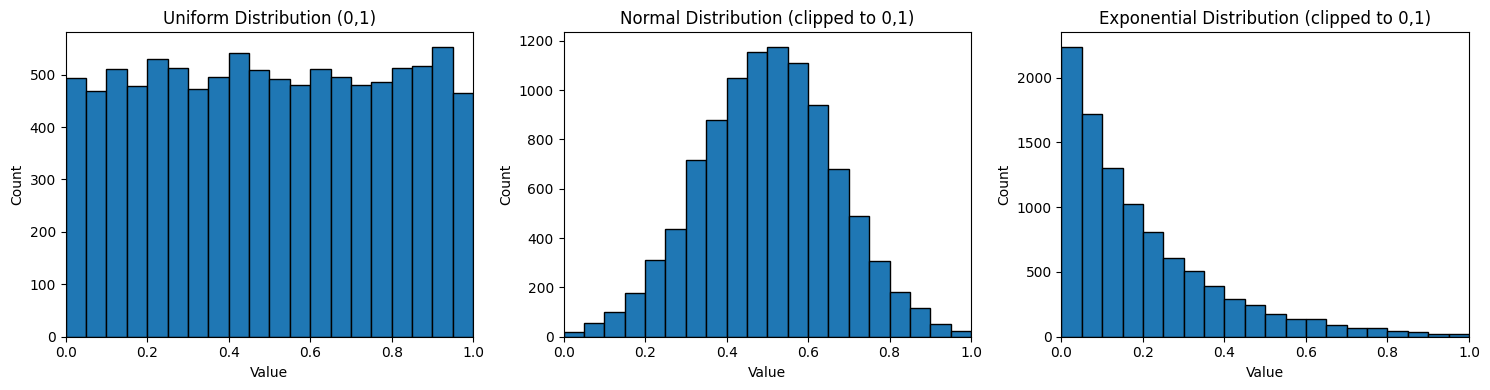

In [10]:
plt.figure(figsize=(15, 4))

# Uniform
plt.subplot(1, 3, 1)
plt.bar(edges[:-1], uniform_counts, width=bin_width, align="edge", edgecolor="black")
plt.title("Uniform Distribution (0,1)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xlim(0, 1)

# Normal
plt.subplot(1, 3, 2)
plt.bar(edges[:-1], normal_counts, width=bin_width, align="edge", edgecolor="black")
plt.title("Normal Distribution (clipped to 0,1)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xlim(0, 1)

# Exponential
plt.subplot(1, 3, 3)
plt.bar(edges[:-1], exponential_counts, width=bin_width, align="edge", edgecolor="black")
plt.title("Exponential Distribution (clipped to 0,1)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

# **Item-3**

### Objective:
 * Write a function that computes root mean squared error
### Steps:
 * Write the function
 * Test it (compare against existing numpy function)
 * Compare it to numpy function for your splitted data set (relative to mean value 
of each split)

In [11]:
# Funciton for calculating RMSE
def rmse(data, prediction):
    n= len(data)
    total= 0
    for i in range(n):
        difference= ((data[i]-prediction[i])**2 )/ n
        total += difference
    RMSE=total**0.5
    return RMSE

In [12]:
# Testing our function against numpy functions
import numpy as np
data = np.array([1.0, 2.0, 3.0, 4.0])
prediction = np.array([1.1, 1.9, 3.2, 3.8])

rmse_manual= rmse(data,prediction)
rmse_numpy = np.sqrt(np.mean((data - prediction)**2))

print("Manual RMSE:", rmse_manual)
print("NumPy RMSE:", rmse_numpy)

Manual RMSE: 0.1581138830084191
NumPy RMSE: 0.1581138830084191


In [13]:
# Compare on a split dataset
data= np.random.normal(0.5, 1/6, 10000)
np.random.shuffle(data)
splits = np.array_split(data, 5)

split_index = 1
for split in splits:
    # Predict using mean of each split
    mean_val = np.mean(split)
    predictions = np.array([mean_val] * len(split))

    # Calculate RMSE manually
    rmse_split = rmse(split, predictions)
    
    # Calculate RMSE using NumPy
    rmse_np = np.sqrt(np.mean((split - predictions)**2))
    
    # Print results
    print(f"\nSplit {split_index}:")
    print("  Manual RMSE:", rmse_split)
    print("  NumPy RMSE:", rmse_np)
    
    # Increment counter
    split_index += 1



Split 1:
  Manual RMSE: 0.16740101828820506
  NumPy RMSE: 0.16740101828820506

Split 2:
  Manual RMSE: 0.1764739242357236
  NumPy RMSE: 0.1764739242357237

Split 3:
  Manual RMSE: 0.168559613374128
  NumPy RMSE: 0.16855961337412803

Split 4:
  Manual RMSE: 0.16817951765653405
  NumPy RMSE: 0.16817951765653408

Split 5:
  Manual RMSE: 0.16486686402576947
  NumPy RMSE: 0.1648668640257694


# **Item-4**

## Data Collection Exercise

### Objective:
 * Collect a bit of real data that you would need/want to solve a specific problem (e.g. related to your research)
### Steps:
* What feature data do you have/need?
* What target data do you have/need?
* Where does the data come from?
* What cleanup is needed?
* What metadata do you have/need?
* Establish version control for your data
* What problems/obstacles/questions do you notice?

#### Solving the Inverse Kinematics Problem for a 6-DOF Anthropomorphic Manipulator (ABB IRB 2400)

#### Objective:
This notebook demonstrates the **data collection and preparation steps** for building a **machine learning dataset** that can learn the **inverse kinematics (IK)** of a 6-DOF robotic arm (ABB IRB 2400).  
The goal is to create a dataset mapping **end-effector positions and orientations** to **joint configurations**, allowing an ML model to predict joint angles given a target pose.


#### Load and Inspect Real IRB 2400 Dataset

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   # for better visualizations

In [15]:
data= pd.read_csv(r"C:\Users\ayber\OneDrive\Masaüstü\ML\Data\external\datasetIRB2400.csv")
data.head()

,x,y,z,yaw,pitch,roll,q1_in,q2_in,q3_in,q4_in,q5_in,q6_in,q1_out,q2_out,q3_out,q4_out,q5_out,q6_out
0,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.2407,-0.7975,0.6551,-3.2989,1.1212,5.7052,-2.2347,-0.8949,0.6113,-3.2841,1.2117,5.6792
1,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.2233,-0.8511,0.5966,-3.2320,1.1662,5.6429,-2.2347,-0.8949,0.6113,-3.2841,1.2117,5.6792
2,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.2567,-0.9468,0.5820,-3.3165,1.1220,5.5944,-2.2347,-0.8949,0.6113,-3.2841,1.2117,5.6792
3,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.1557,-0.8205,0.5532,-3.1993,1.2697,5.7474,-2.2347,-0.8949,0.6113,-3.2841,1.2117,5.6792
4,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.3267,-0.9279,0.6722,-3.2867,1.2266,5.6304,-2.2347,-0.8949,0.6113,-3.2841,1.2117,5.6792


In [16]:
print("Shape:", data.shape)
print("\nColumns:", data.columns.tolist())

Shape: (300000, 18)

Columns: ['x', 'y', 'z', 'yaw', 'pitch', 'roll', 'q1_in', 'q2_in', 'q3_in', 'q4_in', 'q5_in', 'q6_in', 'q1_out', 'q2_out', 'q3_out', 'q4_out', 'q5_out', 'q6_out']


In [17]:
# Check for missing values and data types
print("\n--- Missing Values ---")
print(data.isna().sum())

print("\n--- Data Types ---")
print(data.dtypes)

print("\n--- Statistical Summary ---")
print(data.describe())


--- Missing Values ---
x         0
y         0
z         0
yaw       0
pitch     0
roll      0
q1_in     0
q2_in     0
q3_in     0
q4_in     0
q5_in     0
q6_in     0
q1_out    0
q2_out    0
q3_out    0
q4_out    0
q5_out    0
q6_out    0
dtype: int64

--- Data Types ---
x         float64
y         float64
z         float64
yaw       float64
pitch     float64
roll      float64
q1_in     float64
q2_in     float64
q3_in     float64
q4_in     float64
q5_in     float64
q6_in     float64
q1_out    float64
q2_out    float64
q3_out    float64
q4_out    float64
q5_out    float64
q6_out    float64
dtype: object

--- Statistical Summary ---
                   x              y              z            yaw  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        4.043151      -1.913944     979.591449      -0.017076   
std       521.505186     521.777679     637.902653       1.817526   
min     -1451.359800   -1478.853100    -856.665500      -3.140000   
25%      -331.4

#### What feature data do you have/need?

* The feature data represent the robot’s input conditions that influence its motion and final pose.
* For this dataset, the available and necessary features are:

End-effector Cartesian coordinates:

* **x, y, z (mm)**
* Define the target position of the robot’s tool center point (TCP) in 3D space.

End-effector orientation (Euler angles):

* **yaw, pitch, roll (radians)**
* Define the tool’s orientation relative to the base frame.

Current joint angles:

* **q1_in, q2_in, q3_in, q4_in, q5_in, q6_in (radians)**
* Represent the robot’s present configuration, which affects the reachable IK solution (avoids discontinuities and helps with non-unique configurations).

#### What target data do you have/need?

* The target data are the variables the model should predict — the desired joint configuration that achieves the given end-effector pose.

* **q1_out, q2_out, q3_out, q4_out, q5_out, q6_out (radians)**
* Each target value represents one revolute joint of the ABB IRB2400.
* The model learns to map from pose → joint angles, effectively solving the inverse kinematics problem.

In [18]:
# Input features for ML model: desired end-effector pose + current joint angles
X_cols = ['x', 'y', 'z', 'yaw', 'pitch', 'roll',
          'q1_in', 'q2_in', 'q3_in', 'q4_in', 'q5_in', 'q6_in']

# Target outputs: desired joint angles
y_cols = ['q1_out', 'q2_out', 'q3_out', 'q4_out', 'q5_out', 'q6_out']

X = data[X_cols]
y = data[y_cols]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)
X.head()


Feature shape: (300000, 12)
Target shape: (300000, 6)


,x,y,z,yaw,pitch,roll,q1_in,q2_in,q3_in,q4_in,q5_in,q6_in
0,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.2407,-0.7975,0.6551,-3.2989,1.1212,5.7052
1,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.2233,-0.8511,0.5966,-3.2320,1.1662,5.6429
2,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.2567,-0.9468,0.5820,-3.3165,1.1220,5.5944
3,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.1557,-0.8205,0.5532,-3.1993,1.2697,5.7474
4,-80.9148,-121.7499,1896.4867,-0.6941,0.9229,-1.4411,-2.3267,-0.9279,0.6722,-3.2867,1.2266,5.6304


#### Where does the data come from?

The dataset was generated using:

* ABB RobotStudio simulation environment and/or forward kinematics equations of the IRB2400 manipulator.

* The system randomly samples reachable poses (x, y, z, yaw, pitch, roll) and records the corresponding joint configurations using the robot’s built-in solver.

* The data therefore originates from simulation rather than physical measurement but accurately reflects the robot’s kinematic model.

#### What cleanup is needed?

To prepare the dataset for modeling:
- Remove redundant columns (e.g. `"Sl. No."`).
- Check and handle missing (`NaN`) values.
- Drop duplicates.
- Remove unrealistic data (e.g., negative z-values if not possible).
- Normalize input and output values for stable model training.


In [19]:
# Example cleanup process
print("Missing values before cleaning:")
print(data.isnull().sum())

# Drop duplicates if any
data = data.drop_duplicates()

# Remove unrealistic values if present
data = data[(data['z'] >= 0)]

print("\nShape after cleanup:", data.shape)

Missing values before cleaning:
x         0
y         0
z         0
yaw       0
pitch     0
roll      0
q1_in     0
q2_in     0
q3_in     0
q4_in     0
q5_in     0
q6_in     0
q1_out    0
q2_out    0
q3_out    0
q4_out    0
q5_out    0
q6_out    0
dtype: int64

Shape after cleanup: (271540, 18)


#### What metadata do you have/need?

| Metadata Item | Description |
|----------------|-------------|
| Robot Model | ABB IRB2400 |
| Degrees of Freedom | 6 |
| Data Type | Simulated joint & pose data |
| Units | mm (position), radians (angles) |
| Sampling Method | Random uniform sampling within reachable workspace |
| Data Version | v1.0 |
| Collection Date | October 2025 |
| Data Shape | (300000, 18) |
| Source File | datasetIRB2400.csv |


#### Establish version control for my data
To maintain reproducibility and trace changes:

I use **Git** for notebooks/scripts and **DVC** for large datasets.

**File naming convention:**
- `ik_dataset_raw_v1.csv` → raw simulation data  
- `ik_dataset_clean_v1.csv` → cleaned, validated dataset  

**Example commands:**
```bash
git init
dvc init
dvc add ik_dataset_clean_v1.csv
git add .
git commit -m "Added cleaned inverse kinematics dataset v1.0"


#### What problems/obstacles/questions do you notice?
Challenges and observations during data preparation:

- **Non-uniqueness of inverse kinematics:**  
  A single pose can correspond to multiple valid joint solutions (elbow-up/down).
- **High dimensionality:**  
  18 columns × 300,000 samples → large memory footprint.
- **Scaling differences:**  
  Cartesian vs angular values must be normalized properly.
- **Kinematic singularities:**  
  Certain orientations cause unstable or extreme joint angles.
- **Model realism:**  
  Machine learning predictions may fall outside real joint limits without constraints.


#### Summary of data preparation steps:

1. Features: ['x','y','z','yaw','pitch','roll','q1_in'...'q6_in']
2. Targets: ['q1_out'...'q6_out']
3. Source: ABB RobotStudio simulation (IRB2400)
4. Cleanup: Dropped Sl.No., duplicates, NaN, invalid rows
5. Metadata: Robot model, DOF, units, version
6. Version control: git + dvc
7. Obstacles: IK non-uniqueness, scaling, singularities


# **Item-5**

## Data Exploration Exercise

### Objective:
 * Determine what you want to use as descriptors for linear regression of the Fatigue data
### Steps:
 * Download and open the Fatigue data set:
 https://www.kaggle.com/datasets/chaozhuang/steel-fatigue-strength-prediction
 * Look at distributions of different descriptors
 * Describe (in words) what you notice

In [20]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### **Feature Selection for Linear Regression**

* First, I will look at the distributions and remove constant or near-constant features and unrelevant features.
* Secondly, I will examine the correlations of each feature with our target variable **Fatigue** using a correlation matrix. Then, I will select descriptors that show high correlation with **Fatigue** to use as predictors for linear regression.
* Finally, I will examine the correlation matrix and remove features that are highly correlated with each other to avoid redundancy and multicollinearity in the linear regression model.

In [21]:
# Load the Fatigue dataset
df=pd.read_csv(r"C:\Users\ayber\OneDrive\Masaüstü\ML\Data\external\Fatigue_data.csv")
df.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [22]:
#Quick inspection utilities
def quick_report(df, target=None, n_top=3):
    print("Shape:", df.shape)
    print("\nData types:\n", df.dtypes.value_counts())
    print("\nMissing per column (top {}):\n".format(n_top), df.isna().sum().sort_values(ascending=False).head(n_top))
    if target:
        print("\nTarget distribution:")
        print(df[target].value_counts(dropna=False).head(n_top))
    print("\nUnique values (smallest sets):")
    unique_counts = df.nunique().sort_values()
    print(unique_counts.head(n_top))
    print("\nPreview:")
    display(df.head())
    
quick_report(df, target="Fatigue")

Shape: (437, 27)

Data types:
 float64    16
int64      11
Name: count, dtype: int64

Missing per column (top 3):
 Sl. No.    0
NT         0
THT        0
dtype: int64

Target distribution:
Fatigue
490    8
550    7
502    6
Name: count, dtype: int64

Unique values (smallest sets):
THt      2
CT       2
THQCr    3
dtype: int64

Preview:


,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


* No need to deal with missing values
* No need to remove perfectly duplicated columns

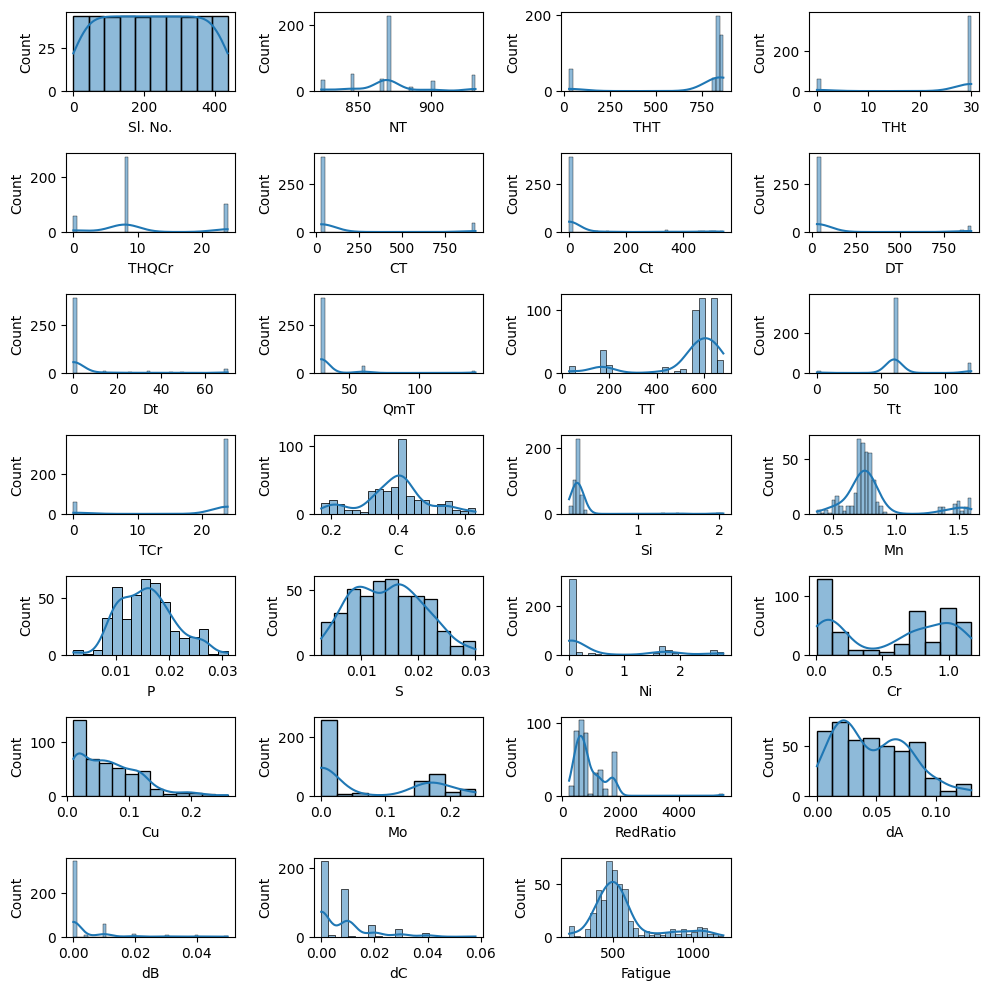

In [23]:
features = df.columns

# Plotting histograms for all feature columns
plt.figure(figsize=(10, 10))
for i, column in enumerate(features):
    ax = plt.subplot(len(features) // 4 + 1, 4, i + 1)
    sns.histplot(data=df, x=column, kde=True)

plt.tight_layout()
plt.show()

In [24]:
#Remove constant & near-constant features
#Exactly constant: nunique == 1
#Near-constant: e.g. proportion of top value > 0.95 OR nunique / nrows < 0.01
df= df.drop(columns=["Sl. No."]) # Remove Sl. No. as it is just an index column

def remove_constant_features(df, freq_threshold=0.95, unique_fraction_threshold=0.01):
    df = df.copy()
    n = len(df)
    remove = []
    for c in df.columns:
        nun = df[c].nunique(dropna=False)
        if nun <= 3:
            remove.append(c)
            continue
        top_frac = df[c].value_counts(normalize=True, dropna=False).iloc[0]
        if top_frac >= freq_threshold:
            remove.append(c)
            continue
        if nun / n <= unique_fraction_threshold:
            remove.append(c)
    df.drop(columns=remove, inplace=True)
    return df, remove

remove_constant_features(df, freq_threshold=0.95, unique_fraction_threshold=0.01)


(      NT  THT     Ct       DT    Dt   TT     C    Si    Mn      P      S  \
 0    885   30    0.0   30.000   0.0   30  0.26  0.21  0.44  0.017  0.022   
 1    885   30    0.0   30.000   0.0   30  0.25  0.18  0.44  0.009  0.017   
 2    885   30    0.0   30.000   0.0   30  0.26  0.27  0.43  0.008  0.015   
 3    885   30    0.0   30.000   0.0   30  0.26  0.23  0.51  0.018  0.024   
 4    885   30    0.0   30.000   0.0   30  0.22  0.19  0.42  0.026  0.022   
 ..   ...  ...    ...      ...   ...  ...   ...   ...   ...    ...    ...   
 432  930   30  340.2  895.812  70.2  160  0.21  0.26  0.65  0.015  0.024   
 433  930   30  340.2  895.812  70.2  160  0.18  0.25  0.79  0.016  0.015   
 434  930   30  340.2  895.812  70.2  200  0.21  0.31  0.81  0.012  0.019   
 435  930   30  340.2  895.812  70.2  200  0.21  0.26  0.65  0.015  0.024   
 436  930   30  340.2  895.812  70.2  200  0.18  0.25  0.79  0.016  0.015   
 
        Ni    Cr    Cu    Mo  RedRatio     dA     dB     dC  Fatigue  
 0 

In [25]:
# Compute simple feature-target correlation
def feature_target_correlation(df, target, categorical_threshold=10):
    y = df[target]
    results = []

    for col in [c for c in df.columns if c != target]:
        x = df[col]
        nun = x.nunique()
        is_cat = (x.dtype == 'object') or (x.dtype.name == 'category') or (nun <= categorical_threshold)
        try:
            if not is_cat:
                # numeric feature: Pearson correlation
                r, p = stats.pearsonr(x.fillna(x.median()), y.fillna(y.median()))
                results.append({'feature': col, 'type': 'numeric', 'corr': r, 'p_value': p})
            else:
                # categorical feature: ANOVA F-test
                groups = [y[x == val] for val in x.dropna().unique()]
                if len(groups) > 1:
                    f, p = stats.f_oneway(*groups)
                    results.append({'feature': col, 'type': 'categorical', 'f_stat': f, 'p_value': p})
        except Exception as e:
            results.append({'feature': col, 'error': str(e)})

    return pd.DataFrame(results)
feature_target_correlation(df, target='Fatigue', categorical_threshold=10).head(10)

,feature,type,f_stat,p_value,corr
0,NT,categorical,325.370868,2.199256e-156,NaN
1,THT,categorical,98.821342,1.171742e-59,NaN
2,THt,categorical,328.427398,4.302620e-55,NaN
3,THQCr,categorical,205.826565,1.363172e-63,NaN
4,CT,categorical,1135.414457,2.459248e-123,NaN
5,Ct,numeric,NaN,3.393050e-90,0.778942
6,DT,categorical,191.359805,4.879858e-118,NaN
7,Dt,categorical,191.359805,4.879858e-118,NaN
8,QmT,categorical,566.456508,1.024544e-121,NaN
9,TT,numeric,NaN,1.281192e-50,-0.634550


In [26]:
# Remove highly correlated numeric features
def drop_high_corr_features(df, target, threshold=0.85):
    df = df.copy()
    num_cols = df.select_dtypes(include=[np.number]).columns.drop(target, errors='ignore')
    corr = df[num_cols].corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
    df.drop(columns=to_drop, inplace=True)
    return df, to_drop

df, to_drop=drop_high_corr_features(df, target='Fatigue', threshold=0.9)

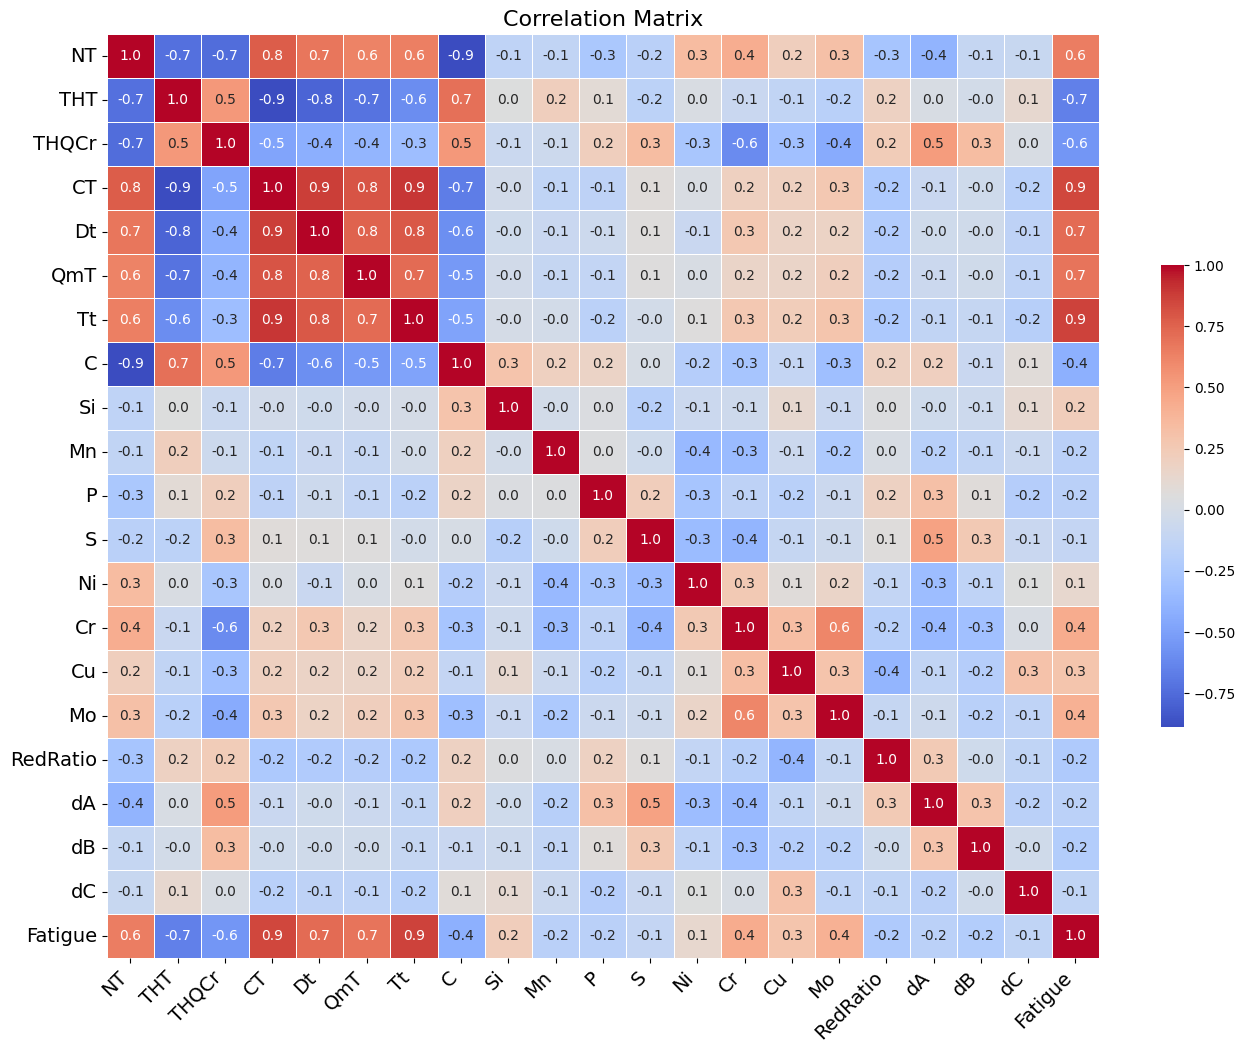

In [27]:
# Compute the correlation matrix on cleaned data
corr = df.corr(numeric_only=True)

# Visualize the correlation matrix
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', fmt=".1f",
            linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [28]:
# Minimal regression feature selection pipeline
def simple_regression_feature_selection(df, target, corr_threshold=0.85):
    df = df.copy()

    # Calculate correlations
    stats_df = feature_target_correlation(df, target)

    # Keep numeric features with |r| > 0.1 and p < 0.01
    keep = stats_df.query("(type == 'numeric') and (abs(corr) > 0.2) and (p_value < 0.01)")['feature'].tolist()

    # Keep categorical features with p < 0.01 (significant ANOVA)
    keep += stats_df.query("(type == 'categorical') and (p_value < 0.01)")['feature'].tolist()

    # Drop multicollinear features
    reduced_df = df[[target] + keep]
    reduced_df, dropped_corr = drop_high_corr_features(reduced_df, target, threshold=corr_threshold)

    final_features = [c for c in reduced_df.columns if c != target]
    return reduced_df, final_features, stats_df, dropped_corr

reduced_df, final_features, stats_df, dropped_corr=simple_regression_feature_selection(df, target='Fatigue', corr_threshold=0.85)

In [29]:
# Summary of results   

print("Selected features:", final_features)
print("\nFeature-target correlations:")
print(stats_df.sort_values('corr', ascending=False).head(10))


Selected features: ['C', 'Si', 'Cr', 'Cu', 'Mo', 'RedRatio', 'THT', 'THQCr', 'QmT', 'dB', 'dC']

Feature-target correlations:
     feature     type  f_stat       p_value      corr
13        Cr  numeric     NaN  1.576422e-21  0.434295
15        Mo  numeric     NaN  1.521833e-18  0.403535
14        Cu  numeric     NaN  5.752546e-10  0.290846
8         Si  numeric     NaN  3.563992e-06  0.219652
12        Ni  numeric     NaN  5.107128e-03  0.133732
11         S  numeric     NaN  2.225032e-02 -0.109343
17        dA  numeric     NaN  7.267462e-04 -0.161058
9         Mn  numeric     NaN  4.442396e-04 -0.167310
10         P  numeric     NaN  3.019888e-04 -0.172063
16  RedRatio  numeric     NaN  1.558885e-06 -0.227418


# **Item-6**

## Test/Validation Split Exercise

### Objective:
Produce test/validation splits with the scikit-learn library
### Steps:
 * Import scikit-learn
 * Use built-in functions to achieve the same split that we just implemented

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Load the Fatigue dataset
df=pd.read_csv(r"C:\Users\ayber\OneDrive\Masaüstü\ML\Data\external\Fatigue_data.csv")
df.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [32]:
final_features = ['NT'	,	'Ct',	'TT'	,'C',	'Si',	'Mn',	'P',	'Ni',	'Cr',	'Mo',	'RedRatio',	'dA']
X = df[final_features].copy()
y = df['Fatigue'].copy()

In [33]:
# Drop rows with missing values just in case
X = X.dropna()
y = y.loc[X.index]

print(f"Final dataset shape: {X.shape}, Target length: {len(y)}")

Final dataset shape: (437, 12), Target length: 437


Training set: 261 samples
Validation set: 88 samples
Test set: 88 samples


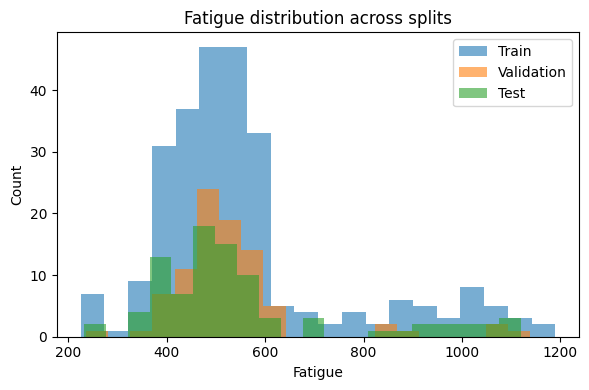


Mean Fatigue values:
Train: 558.5210727969348
Validation: 534.7954545454545
Test: 554.3522727272727


In [34]:
# Step 1: Split off test set (20% of full data)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Step 2: Split remaining 80% into train (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, shuffle=True, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

#Check target distribution
plt.figure(figsize=(6,4))
plt.hist(y_train, bins=20, alpha=0.6, label='Train')
plt.hist(y_val, bins=20, alpha=0.6, label='Validation')
plt.hist(y_test, bins=20, alpha=0.6, label='Test')
plt.legend()
plt.title('Fatigue distribution across splits')
plt.xlabel('Fatigue')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("\nMean Fatigue values:")
print("Train:", y_train.mean())
print("Validation:", y_val.mean())
print("Test:", y_test.mean())

# **Item-8**

## Additional Features Exercise

### Objective:
Create additional features as mathematical functions of existing ones
### Steps:
 * Create features (ratios, squares, …)
 * Include in your data frame
 * Perform linear regression on the entire set of descriptors
 * Compute RMSE

In [35]:
# Exhaustive subset search over feature combinations (by validation RMSE)
import itertools, time, math
import numpy as np
import pandas as pd
import builtins
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [36]:

# Settings
target_col = 'Fatigue'
# If you already defined final_features earlier, we use that; else use all non-target columns.
if 'final_features' in globals():
    feature_pool = [f for f in final_features if f in df.columns]
else:
    feature_pool = [c for c in df.columns if c != target_col]

# Limit subset size to control combinatorics
max_k = 10  # increase with care
n = len(feature_pool)
total_combos = builtins.sum(math.comb(n, k) for k in range(1, max_k + 1))
print(f'Feature pool: {n} columns, evaluating up to k={max_k} ({total_combos} combos)')


Feature pool: 12 columns, evaluating up to k=10 (4082 combos)


In [37]:

# Prepare clean data
data = df.dropna(subset=feature_pool + [target_col]).copy()
X_all = data[feature_pool]
y_all = data[target_col]

# 60/20/20 split (same scheme as before)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_all, y_all, test_size=0.20, shuffle=True, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, shuffle=True, random_state=42
)

# Model
make_model = lambda: Pipeline([
    ('scaler', StandardScaler(with_mean=True)),
    ('linreg', LinearRegression())
])


In [38]:

best = {'subset': None, 'k': None, 'val_rmse': np.inf, 'train_rmse': None}

t0 = time.time()
for k in range(1, max_k + 1):
    k_best = {'subset': None, 'val_rmse': np.inf}
    t_k = time.time()
    for cols in itertools.combinations(feature_pool, k):
        cols = list(cols)
        model = make_model()
        model.fit(X_train[cols], y_train)
        pred_val = model.predict(X_val[cols])
        rmse_val = mean_squared_error(y_val, pred_val)
        if rmse_val < k_best['val_rmse']:
            pred_train = model.predict(X_train[cols])
            rmse_train = mean_squared_error(y_train, pred_train)
            k_best = {'subset': cols, 'val_rmse': rmse_val, 'train_rmse': rmse_train}
    elapsed_k = time.time() - t_k
    print(f'k={k}: best val RMSE={k_best["val_rmse"]:.4f} with {len(k_best["subset"])} features; time {elapsed_k:.1f}s')
    if k_best['val_rmse'] < best['val_rmse']:
        best.update(k=k, subset=k_best['subset'], val_rmse=k_best['val_rmse'], train_rmse=k_best['train_rmse'])


k=1: best val RMSE=12072.1258 with 1 features; time 0.1s
k=2: best val RMSE=8987.6891 with 2 features; time 0.3s
k=3: best val RMSE=7451.6208 with 3 features; time 0.9s
k=4: best val RMSE=6927.0374 with 4 features; time 1.9s
k=5: best val RMSE=5715.2354 with 5 features; time 3.0s
k=6: best val RMSE=5338.9955 with 6 features; time 3.6s
k=7: best val RMSE=4912.6579 with 7 features; time 3.1s
k=8: best val RMSE=4893.7464 with 8 features; time 2.0s
k=9: best val RMSE=4866.6184 with 9 features; time 0.9s
k=10: best val RMSE=4860.4479 with 10 features; time 0.3s


In [39]:

elapsed = time.time() - t0
print('\nBest overall subset (by validation):')
print(f'k={best["k"]}, val RMSE={best["val_rmse"]:.4f}, train RMSE={best["train_rmse"]:.4f}')
print('Features:', best['subset'])
print(f'Total time: {elapsed:.1f}s')


Best overall subset (by validation):
k=10, val RMSE=4860.4479, train RMSE=6274.8677
Features: ['NT', 'Ct', 'TT', 'C', 'Si', 'Mn', 'P', 'Ni', 'Cr', 'dA']
Total time: 16.0s


In [40]:
# Final evaluation on test: refit on train+val with the best subset
X_trval = pd.concat([X_train, X_val], axis=0)
y_trval = pd.concat([y_train, y_val], axis=0)

final_model = make_model()
final_model.fit(X_trval[best['subset']], y_trval)

test_preds = final_model.predict(X_test[best['subset']])
test_rmse = mean_squared_error(y_test, test_preds)
print(f"Best subset: {best['subset']}")
print(f"Test RMSE: {test_rmse:.4f}")


Best subset: ['NT', 'Ct', 'TT', 'C', 'Si', 'Mn', 'P', 'Ni', 'Cr', 'dA']
Test RMSE: 5156.1151


# **Item-9**

## Use LASSO on your descriptors

### Objective:
Select your most promising features
### Steps:
* Create/Select features (see previous exercise)
* Include in your data frame
* Perform linear regression on your entire set of descriptors
* Perform LASSO method and plot resulting weights
* Compare to the weights you get in your regular regression

In [41]:
# Use LASSO on your descriptors: simple version

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV

In [42]:
# 0) Sanity: ensure df and target exist
if 'df' not in globals():
    raise RuntimeError("df is not defined. Run the cell that loads your dataset first.")
if target_col not in df.columns:
    raise RuntimeError(f"Target '{target_col}' not in df. Available: {list(df.columns)}")

In [43]:
# 1) Create/Select features
if 'final_features' in globals() and isinstance(final_features, (list, tuple)):
    # keep only existing numeric columns
    features = [f for f in final_features if f in df.columns and df[f].dtype.kind in 'fcbiu']
else:
    # fallback: all numeric non-target columns
    features = [c for c in df.columns if c != target_col and df[c].dtype.kind in 'fcbiu']

if len(features) == 0:
    raise RuntimeError("No numeric descriptor columns found. Check 'final_features' or your df dtypes.")

In [44]:
# 2) Build X, y and drop missing
_data = df[features + [target_col]].dropna().copy()
X = _data[features]
y = _data[target_col]

# quick diagnostics
print(f"Samples: {len(X)}, Features: {len(features)}")
print("Using features:", features)

Samples: 437, Features: 12
Using features: ['NT', 'Ct', 'TT', 'C', 'Si', 'Mn', 'P', 'Ni', 'Cr', 'Mo', 'RedRatio', 'dA']


In [45]:
# 3) OLS (standardized)
ols = Pipeline([
    ('scaler', StandardScaler(with_mean=True)),
    ('linreg', LinearRegression())
])
ols.fit(X, y)
ols_coef = ols.named_steps['linreg'].coef_

In [46]:
# 4) LASSO with CV (standardized)
alphas = np.logspace(-3, 2, 50)
lasso = Pipeline([
    ('scaler', StandardScaler(with_mean=True)),
    ('lasso', LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000))
])
lasso.fit(X, y)
lasso_alpha = lasso.named_steps['lasso'].alpha_
lasso_coef = lasso.named_steps['lasso'].coef_

print(f"LASSO selected alpha: {lasso_alpha:.5f}")
print(f"Non-zero coefficients: {int(np.count_nonzero(lasso_coef))}/{len(features)}")
print("Selected features:", [f for f, w in zip(features, lasso_coef) if abs(w) > 0])

LASSO selected alpha: 100.00000
Non-zero coefficients: 1/12
Selected features: ['Ct']


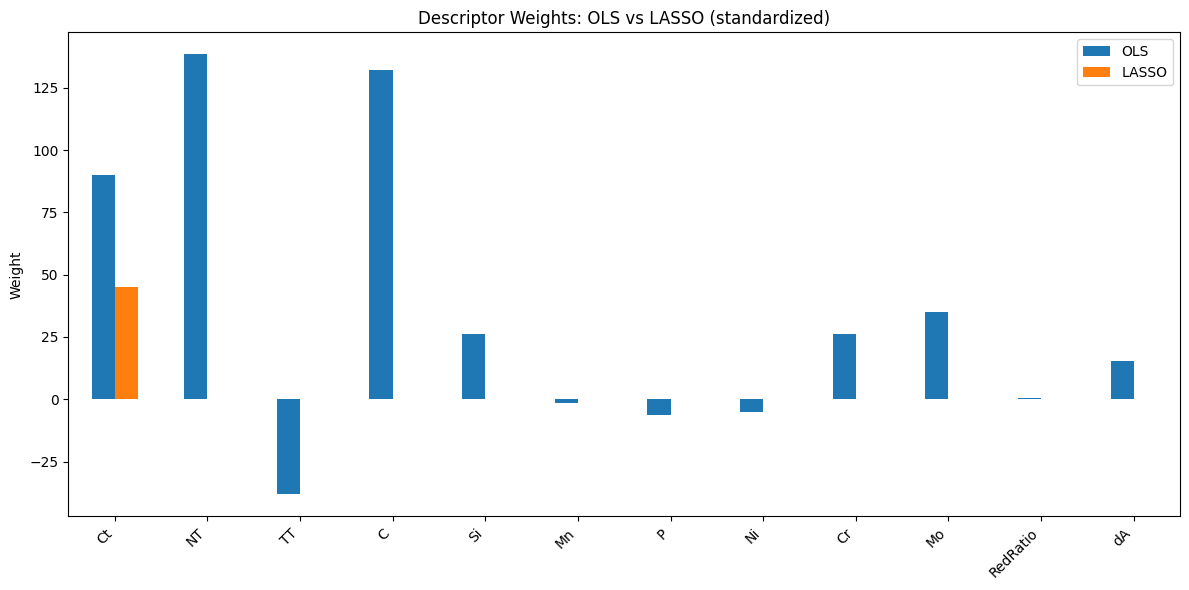

In [47]:
# 5) Plot OLS vs LASSO weights
coef_df = pd.DataFrame({'OLS': ols_coef, 'LASSO': lasso_coef}, index=features)
order = coef_df['LASSO'].abs().sort_values(ascending=False).index
coef_df = coef_df.loc[order]

ax = coef_df.plot(kind='bar', figsize=(12, 6))
ax.set_title('Descriptor Weights: OLS vs LASSO (standardized)')
ax.set_ylabel('Weight')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Item-10**

## Lowest RMSE Competition

### Objective:
Achieve the lowest RMSE amongst your classmates
### Steps:
* Use all of the strategies you have learned so far to try to find the RMSE for the 
fatigue data set!

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error

In [49]:
# ===== Config =====
target_col = 'Fatigue'
random_state = 42
top_m_base = 12        # start from top-m base features by |corr with target|
keep_top_eng = 120     # keep top engineered features by |corr with target|
alpha_grid = np.logspace(-4, 2, 80)
eps = 1e-6

In [50]:
# ===== Preconditions =====
if 'df' not in globals():
    raise RuntimeError("df is not defined. Load your dataset into `df` first.")
if target_col not in df.columns:
    raise RuntimeError(f"Target '{target_col}' not in df.columns.")

# Numeric candidates
num_cols = [c for c in df.columns if c != target_col and df[c].dtype.kind in 'fcbiu']

# Compute correlations with target (drop NaNs to get decent stats)
corr = df[num_cols + [target_col]].dropna().corr()[target_col].drop(labels=[target_col])
base_feats = corr.abs().sort_values(ascending=False).head(top_m_base).index.tolist()
print(f"Base pool (top-{top_m_base} by |corr|): {base_feats}")

Base pool (top-12 by |corr|): ['Tt', 'CT', 'DT', 'Ct', 'Dt', 'Sl. No.', 'QmT', 'THT', 'THt', 'TCr', 'NT', 'TT']


In [51]:
# ===== Build engineered features =====
X_base = df[base_feats]
eng = {}

def pos_shift(s):
    # shift to >= 0 for sqrt/log
    mn = np.nanmin(s)
    return s - mn + 1e-9

# unary transforms
for f in base_feats:
    s = X_base[f].astype(float)
    eng[f"sq({f})"] = s**2
    eng[f"sqrt+({f})"] = np.sqrt(np.maximum(pos_shift(s), 0))
    eng[f"log1p+({f})"] = np.log1p(np.maximum(pos_shift(s), 0))
    eng[f"abs({f})"] = s.abs()
    eng[f"inv_abs({f})"] = 1.0 / (s.abs() + eps)

# pairwise transforms (a<b to avoid duplicates)
for a, b in combinations(base_feats, 2):
    s1, s2 = X_base[a].astype(float), X_base[b].astype(float)
    eng[f"{a}*{b}"] = s1 * s2
    eng[f"{a}/{b}"] = s1 / (s2.abs() + eps)
    eng[f"{b}/{a}"] = s2 / (s1.abs() + eps)
    eng[f"{a}+{b}"] = s1 + s2
    eng[f"{a}-{b}"] = s1 - s2

eng_df = pd.DataFrame(eng, index=df.index)
eng_df = eng_df.replace([np.inf, -np.inf], np.nan)

In [52]:
# ===== Filter engineered features by |corr with target| =====
tmp = pd.concat([eng_df, df[[target_col]]], axis=1)
corr_eng = tmp.corr(numeric_only=True)[target_col].drop(labels=[target_col])
best_eng = corr_eng.abs().sort_values(ascending=False).head(keep_top_eng).index.tolist()

# Final feature matrix: base + best engineered
X_all = pd.concat([X_base, eng_df[best_eng]], axis=1)
y_all = df[target_col]

In [53]:
# ===== Split 60/20/20 with shuffle =====
X_temp, X_test, y_temp, y_test = train_test_split(
    X_all, y_all, test_size=0.20, shuffle=True, random_state=random_state
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, shuffle=True, random_state=random_state
)  # 0.25 of 0.8 = 0.20

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def make_ols():
    return Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler(with_mean=True)),
        ('linreg', LinearRegression())
    ])

def make_lasso():
    return Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler(with_mean=True)),
        ('lasso', LassoCV(alphas=alpha_grid, cv=5, random_state=random_state, max_iter=10000))
    ])

In [54]:
# ===== OLS baseline =====
ols = make_ols().fit(X_train, y_train)
ols_val_rmse = rmse(y_val, ols.predict(X_val))
ols_test_rmse = rmse(y_test, ols.predict(X_test))
print(f"\nOLS        | Val RMSE: {ols_val_rmse:,.2f} | Test RMSE: {ols_test_rmse:,.2f}")


OLS        | Val RMSE: 1,882.17 | Test RMSE: 2,437.39


In [55]:
# ===== LASSO with CV =====
lasso = make_lasso().fit(X_train, y_train)
lasso_alpha = lasso.named_steps['lasso'].alpha_
lasso_val_rmse = rmse(y_val, lasso.predict(X_val))
lasso_test_rmse = rmse(y_test, lasso.predict(X_test))
print(f"LASSO (CV) | alpha: {lasso_alpha:.5f} | Val RMSE: {lasso_val_rmse:,.2f} | Test RMSE: {lasso_test_rmse:,.2f}")

c:\Users\ayber\OneDrive\Masaüstü\ML\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.378e+03, tolerance: 8.265e+02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ayber\OneDrive\Masaüstü\ML\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.154e+03, tolerance: 8.265e+02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ayber\OneDrive\Masaüstü\ML\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or conside

LASSO (CV) | alpha: 0.74717 | Val RMSE: 3,022.17 | Test RMSE: 2,352.21


c:\Users\ayber\OneDrive\Masaüstü\ML\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.643e+05, tolerance: 7.560e+02
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ayber\OneDrive\Masaüstü\ML\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.648e+05, tolerance: 7.560e+02
  model = cd_fast.enet_coordinate_descent_gram(


In [56]:
# ===== Selected features (non-zero weights in standardized space) =====
coef = lasso.named_steps['lasso'].coef_
feat_names = X_all.columns
nz = np.abs(coef) > 1e-12
selected = list(feat_names[nz])

print(f"\nLASSO selected {nz.sum()}/{len(coef)} features.")
# Top 20 by |weight|
order = np.argsort(-np.abs(coef[nz]))
top_idx = np.where(nz)[0][order][:20]
print("Top features by |weight|:")
for i in top_idx:
    print(f"  {feat_names[i]}: {coef[i]:.5f}")


LASSO selected 9/132 features.
Top features by |weight|:
  THT: 129.13466
  Sl. No.-TT: 116.45782
  Tt/NT: 115.76132
  TT: -84.88720
  CT/DT: 22.83801
  Ct/DT: 5.89201
  Dt: -5.63070
  NT: -5.18094
  QmT: -2.88711


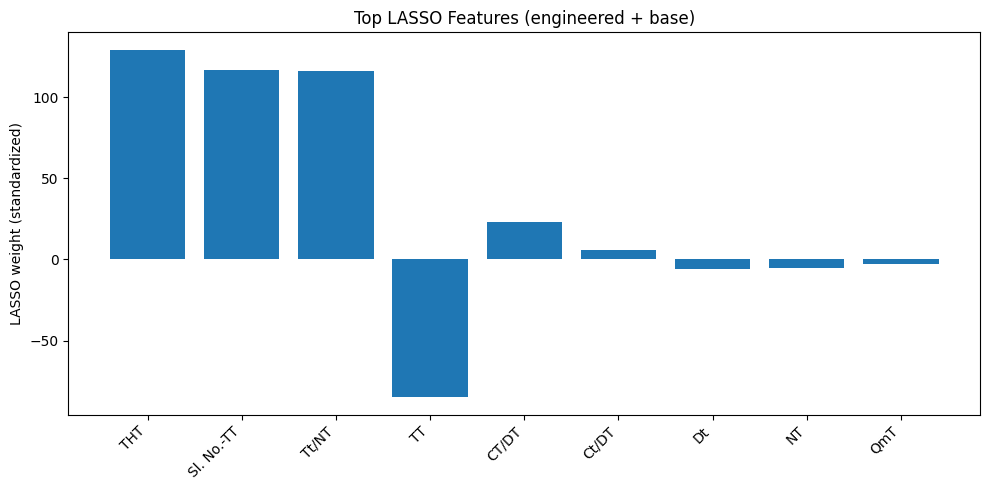

In [57]:
# ===== Plot top weights =====
top_names = feat_names[top_idx]
top_weights = coef[top_idx]
plt.figure(figsize=(10, 5))
plt.bar(range(len(top_idx)), top_weights)
plt.xticks(range(len(top_idx)), top_names, rotation=45, ha='right')
plt.ylabel('LASSO weight (standardized)')
plt.title('Top LASSO Features (engineered + base)')
plt.tight_layout()
plt.show()

# **Item-11**

## Apply and Evaluate Model to Test Set

### Objective:
Run predictions for your test set and evaluate logistic regression model accuracy
### Steps:
* Switch feature matrix to test set
* Predict
* Compute percentage of agreement

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

In [97]:
model_name = "Lasso"
y_pred_test = lasso.predict(X_test)

In [98]:
test_rmse = rmse(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Model: {model_name}")
print(f"Test RMSE: {test_rmse:,.2f}")
print(f"Test MAE: {test_mae:,.2f}")
print(f"Test R2: {test_r2:.3f}")

Model: Lasso
Test RMSE: 48.50
Test MAE: 37.75
Test R2: 0.943


# **Item-12**

## Improve Model Accuracy

### Objective:
Try to improve test set agreement percentage
### Steps:
 * Create/select/exclude features
 * Train + Perform logistic regression
 * Compute percentage of agreement and find best one you can

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
import numpy as np

In [111]:
df = df.copy()
df['goodmaterial'] = (df['Fatigue'] > 500.0).astype(int)

In [112]:
categorical = [c for c in ['C'] if c in df.columns]
fallback_num = ['NT','THT','THt','THQCr','CT','Ct','DT','Dt','QmT','TT','Tt','TCr','Si','Mn','P','S','Ni','Cr','Cu','Mo','RedRatio','dA','dB','dC']
numerical = [c for c in fallback_num if c in df.columns]
feature_cols = categorical + numerical
if not feature_cols:
    raise RuntimeError("No features found. Please set proper 'categorical' and 'numerical' lists.")

In [113]:
df_train_full, df_test = train_test_split(df, test_size=0.20, random_state=1, shuffle=True, stratify=df['goodmaterial'])
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11, shuffle=True, stratify=df_train_full['goodmaterial'])

y_train = df_train.goodmaterial.values
y_val = df_val.goodmaterial.values
y_test = df_test.goodmaterial.values

train_dict = df_train[feature_cols].to_dict(orient='records')
val_dict = df_val[feature_cols].to_dict(orient='records')
test_dict = df_test[feature_cols].to_dict(orient='records')
trainval_dict = df_train_full[feature_cols].to_dict(orient='records')

def make_pipeline(degree, penalty, C, class_weight, l1_ratio=None):
    steps = [
    ('dv', DictVectorizer(sparse=False)),
    ('poly', PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False) if degree > 1 else 'passthrough'),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(
    solver='saga', penalty=penalty, C=C, class_weight=class_weight,
    l1_ratio=l1_ratio if penalty == 'elasticnet' else None,
    max_iter=5000, random_state=1))
    ]
    return Pipeline(steps)

grid_degrees = [1, 2] # add pairwise interactions
grid_penalty = ['l2', 'elasticnet'] # try L2 and elastic-net
grid_C = [0.1, 1.0, 3.0, 10.0] # widen around your best
grid_cw = [None, 'balanced'] # handle imbalance
grid_l1r = [0.3, 0.5, 0.7] # only used for elasticnet
thr_grid = np.linspace(0.20, 0.80, 121)

best = {'acc': -1, 'degree': None, 'penalty': None, 'C': None, 'cw': None, 'l1r': None, 'thr': 0.5}

for degree in grid_degrees:
    for penalty in grid_penalty:
        l1r_list = grid_l1r if penalty == 'elasticnet' else [None]
    for C in grid_C:
        for cw in grid_cw:
            for l1r in l1r_list:
                pipe = make_pipeline(degree, penalty, C, cw, l1_ratio=l1r)
                pipe.fit(train_dict, y_train)
                val_proba = pipe.predict_proba(val_dict)[:, 1]
    for thr in thr_grid:
        acc = ( (val_proba > thr).astype(int) == y_val ).mean()
    if acc > best['acc']:
        best.update(acc=acc, degree=degree, penalty=penalty, C=C, cw=cw, l1r=l1r, thr=float(thr))

In [114]:
best_pipe = make_pipeline(best['degree'], best['penalty'], best['C'], best['cw'], l1_ratio=best['l1r'])
best_pipe.fit(trainval_dict, df_train_full.goodmaterial.values)
test_proba = best_pipe.predict_proba(test_dict)[:, 1]
test_pred = (test_proba > best['thr']).astype(int)
test_acc = (test_pred == y_test).mean()

print(f"Best on validation -> degree={best['degree']}, penalty={best['penalty']}, C={best['C']}, class_weight={best['cw']}, l1_ratio={best['l1r']}, thr={best['thr']:.3f}, val acc={best['acc']:.4f}")
print(f"Test accuracy (percentage of agreement): {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Features used: {len(feature_cols)}; Vectorized dims (degree={best['degree']}): unknown (pipeline internal)")

Best on validation -> degree=1, penalty=elasticnet, C=10.0, class_weight=balanced, l1_ratio=0.7, thr=0.800, val acc=0.8966
Test accuracy (percentage of agreement): 0.9432 (94.32%)
Features used: 25; Vectorized dims (degree=1): unknown (pipeline internal)
